# PLA - Exercise 2

This exercise is intended to create a simple perceptron to solve a binary classification problem with synthetic data generation

## Dataset

Each class will have exactly 350 data points and the seed should be set to 225.

Let's define the first class $X_1$:
- $X_1^1$ is an exponential distribution with _scale_ of 2
- $X_1^2$ is a normal distribution with a mean of 0 and a standard deviation of 5

The second class $X_2$ is defined as follows:
- $X_2^1$ is a uniform distribution from 0 to 5
- $X_2^2$ is a Poisson distribution with lambda 4

The class $X_1$ will have the label "+1" meanwhile $X_2$ will have the label "-1"

In [1]:
import numpy as np

# set seed
np.random.seed(225)

# number of samples per class
N = 350

# 1st class
X1_1 = np.random.exponential(scale=0.5, size=N)
X1_2 = np.random.normal(loc=0, scale=5, size=N)

# 2nd class
X2_1 = np.random.uniform(low=2, high=4, size=N)
X2_2 = np.random.poisson(lam=4, size=N)

# labels
Y1 = np.ones(N)     # class 1
Y2 = - np.ones(N)   # class 2


Plot the generated dataset using the <tt>scatter</tt> function

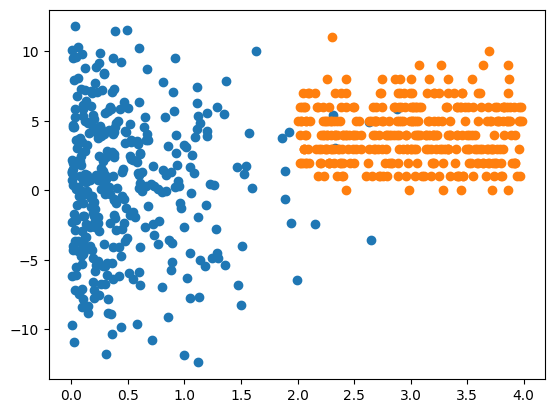

In [2]:
import matplotlib.pyplot as plt

# class 1
plt.scatter(X1_1, X1_2)

# class 2
plt.scatter(X2_1, X2_2)


Create the dataset $X$ by concatenating $X_1$ and $X_2$ and the bias $X_0$. Do the same to create the labels $Y$

In [3]:
# bias X0
X0 = np.ones(2 * N)

# feature X1
X1 = np.concatenate((X1_1, X2_1))

# feature X2
X2 = np.concatenate((X1_2, X2_2))

# dataset X
X = np.stack((X0, X1, X2), axis=1)

# labels
Y = np.concatenate((Y1, Y2))

## Learning

Set up the vector of weight $w$ as an exponential distribution with _scale_ set to 6 then train the Perceptron model using the basic __PLA__ algorithm, implementing the following requirements
- set parameter $\eta$ to $10^{-4}$
- set the maximum number of epochs to 300

In addition, note that we want to keep track of the errors per epoch. Store in a vector named <tt>errors_epoch</tt> the number of misclassified objects for each epoch.


In [4]:
# weight vector
w = np.random.exponential(scale=6, size=X.shape[1])

# eta
eta = 1e-4

# epochs
max_epochs = 300
current_epoch = 0

# errors
errors_epoch = np.zeros(max_epochs)


# start training
while current_epoch < max_epochs:

    # error counter
    errors = 0

    for i in range(0, Y.shape[0]):

        # compute output of the i-th row
        output = np.sign(np.dot(X[i, :], w))

        # if there are errors, update vector
        if output * Y[i] < 0:
            w += eta * X[i, :] * Y[i]
            errors += 1
    
    errors_epoch[current_epoch] = errors
    current_epoch += 1

Now draw the plots containing the solution found by the PLA and the plot containing the errors per epoch

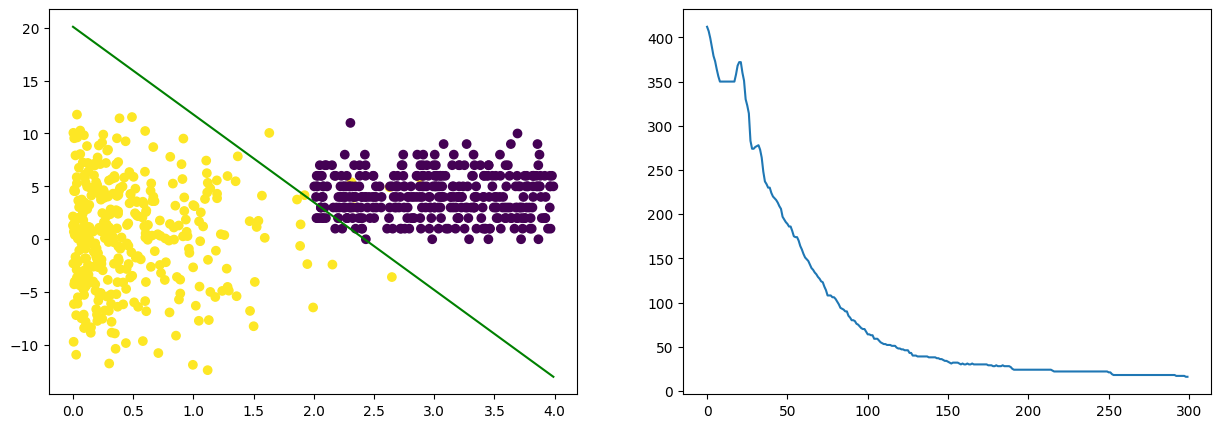

In [5]:
# create two subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 5), sharey = False)

# plots the points 
axs[0].scatter(X[:, 1], X[:, 2], c=Y)

# displays the line
axs[0].plot([np.min(X1_1), np.max(X2_1)],
            [np.min(X1_1) * (-w[1]/w[2]) - w[0]/w[2], np.max(X2_1) * (-w[1]/w[2]) - w[0]/w[2]],
            "green")

# error plot
axs[1].plot(range(errors_epoch.size), errors_epoch)